In [2]:

# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing, 
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

NINO AHMADIY

24083010049

ANALISIS NUMERIK

Optimum (grid search):
Kuliah = 8.84 jam
Main   = 0.32 jam
Quality = 9.81


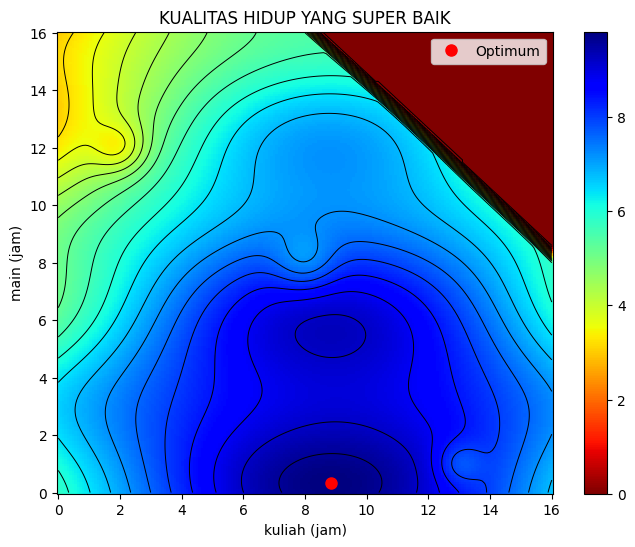

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def objective(x, y):
    kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))
    main_pref   = np.exp(-((y - 2.0)**2) / (10**2))

    kebanyakan_main    = 1 * np.exp(-((x - 2.0)**2 + (y - 12.0)**2) / 0.8)
    kebanyakan_belajar = 0.8 * np.exp(-((x - 13.0)**2 + (y - 1.0)**2) / 0.6)
    powernap           = 0.9 * np.exp(-((x - 8.0)**2 + (y - 8.0)**2) / 1.0)
    total_penalty      = 0.2 * np.exp((x + y) / 24.0)

    # ripple + noise HARUS sama seed supaya konsisten
    NPM = 10049
    rng = np.random.default_rng(NPM)
    noise = rng.normal(loc=0.0, scale=0.1)   # satu sample noise
    ripple = 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) - 0.2 + noise

    Z_val = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z_val = Z_val - kebanyakan_main - kebanyakan_belajar - total_penalty - powernap + ripple

    # penalti total jam > 24
    total_waktu = x + y
    Z_val -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)
    return Z_val


# cari optimum dengan grid search
xmin, xmax, ymin, ymax = 0, 16, 0, 16
res = 200
X = np.linspace(xmin, xmax, res)
Y = np.linspace(ymin, ymax, res)
XX, YY = np.meshgrid(X, Y)

Z = objective(XX, YY)
idx = np.unravel_index(np.argmax(Z), Z.shape)
opt_x, opt_y, opt_z = XX[idx], YY[idx], Z[idx]

print("Optimum (grid search):")
print("Kuliah =", round(opt_x,2), "jam")
print("Main   =", round(opt_y,2), "jam")
print("Quality =", round(opt_z,2))

# heatmap
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(XX, YY, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(XX, YY, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("KUALITAS HIDUP YANG SUPER BAIK")

# titik optimum
plt.plot(opt_x, opt_y, 'ro', markersize=8, label="Optimum")
plt.legend()
plt.show()


Terlihat jelas titik optimal yang diperoleh adala, saya melakukan kuliah selama 8 jam dan main hanya sebanyak 30 menit saja, serta kualitas hidup saya akan meningkat, karna saya lebih prefer ke tidur daripada untuk main.

CERITA AKTIVITAS SAYA SEHARI HARI


Pagi (07.00 – 07.30)
Olahraga ringan dan stretching, ditemani kopi hitam sebagai pembuka hari. Energi pagi terjaga meskipun waktunya singkat.

07.30 – 12.00
Kuliah / belajar efektif sekitar 4,5 jam. Fokus penuh, ini jadi fase produktivitas tertinggi.

12.00 – 13.00
Makan siang dan istirahat sebentar.

13.00 – 17.30
Kembali kuliah dan mengerjakan tugas. Tambahan 4,3 jam sehingga total kuliah hampir 9 jam dalam sehari, sesuai hasil optimum.

17.30 – 18.00
Waktu main singkat, hanya sekitar 20 menit. Cukup untuk sekadar refreshing, scroll sosmed sebentar, atau mendengarkan musik.

18.00 – 19.00
Makan malam + ibadah.

19.00 – 22.00
Aktivitas santai atau nugas ringan. Walaupun model menekankan sedikit waktu main, tetap ada ruang untuk menutup hari dengan hal ringan sebelum tidur.

22.00 – 07.00
Tidur malam panjang dan nyenyak sekitar 9 jam, menjaga kesehatan dan keseimbangan.


Dengan pola ini, kuliah hampir 9 jam/hari jadi pusat aktivitas, waktu main sangat minim (sekitar 20–30 menit), tetapi kualitas hidup tetap tinggi karena istirahat cukup dan ritme stabil.